# DIC(4/587): Phase 1
---

Deliverables
---
1. **Problem Statement:** Form a title and problem statement that clearly state the problem
and questions you are trying to answer. Additionally:
    - Discuss the background of the problem leading to your objectives. Why is it a significant problem?
    - Explain the potential of your project to contribute to your problem domain. Discuss why this contribution is crucial?
2. **Data Sources:** Collect your data. Your data can come from multiple sources.
    - For example, Medical, Bank, sports, health, Kaggle, Amazon reviews, Twitter, Youtube, Reddit, etc. 
    - This data has to be large enough for the data analysis to yield significance. At least 2000 rows.
3. **Data Cleaning/Processing:** Your dataset has to be cleaned and properly processed. Please submit a report where you explain each processing/cleaning step properly. We expect to see comments and markup for this step. 
    - In order to get full marks you must clearly document 7 (10 for 587 students) distinct processing/cleaning operations.
4. **Exploratory Data Analysis (EDA):** Perform exploratory data analysis as defined in the NIST publication [2] and as originally described by John Tukey [4,5]. Record the outcomes and what you learned and how you will use this information.
    - For example, in choosing features (columns) and dropping columns, and in short feature engineering. 
    - You need to demonstrate 7 (10 for 587 students) different, significant and relevant EDA operations and describe how you used these to process the data sets further to provision them for downstream modeling and analytics. Figures and tables should be included where relevant.

Construction Permits in Austin, TX
---
**Problem Statement:**
- [WIP]

**Motivation:**
- [WIP]

**Data Source:**
- [Issued Construction Permits - data.austintexas.gov](https://data.austintexas.gov/Building-and-Development/Issued-Construction-Permits/3syk-w9eu)

    NOTE: *CSV in use for this project will be slightly altered to reduce file size. (Original Size: 1.29GB)*

**Things to Consider:**
- The values in the Total Job Valuation column are often N/A or valued at $0

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats

# Example code for setting up box plotting
---

In [2]:
elec_data = pd.read_csv('Dataset/Electric_Consumption_And_Cost__2010_-_Feb_2022_.csv')
heat_data = pd.read_csv('Dataset/Heating_Gas_Consumption_And_Cost__2010_-__Feb_2022_.csv')
#heat_data.drop(['Meter AMR','Meter Scope','Funding Source','Vendor Name','Estimated','Bill Analyzed'], axis=1)
elec_data = elec_data.drop(['Meter Scope','Funding Source','Vendor Name','Estimated','Bill Analyzed','Meter AMR'], axis=1)
elec_data = elec_data.dropna()
elec_data['Revenue Month'] = pd.to_datetime(elec_data['Revenue Month'], yearfirst=True, infer_datetime_format=True, format= '%y%m')
elec_data.shape

C:\Users\josep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(394156, 21)

In [86]:
import datetime

gtY2020 = datetime.datetime(2020,12,31)
lsY2022 = datetime.datetime(2022,1,1)
elec_data2020s = elec_data[elec_data['Revenue Month']>gtY2020]
#elec_data2020s
elec_data2021 = elec_data2020s[elec_data2020s['Revenue Month']<lsY2022]
elec_data2021['Month'] = elec_data2021['Revenue Month'].dt.month_name()

C:\Users\josep\AppData\Local\Temp/ipykernel_432/4288069437.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elec_data2021['Month'] = elec_data2021['Revenue Month'].dt.month_name()


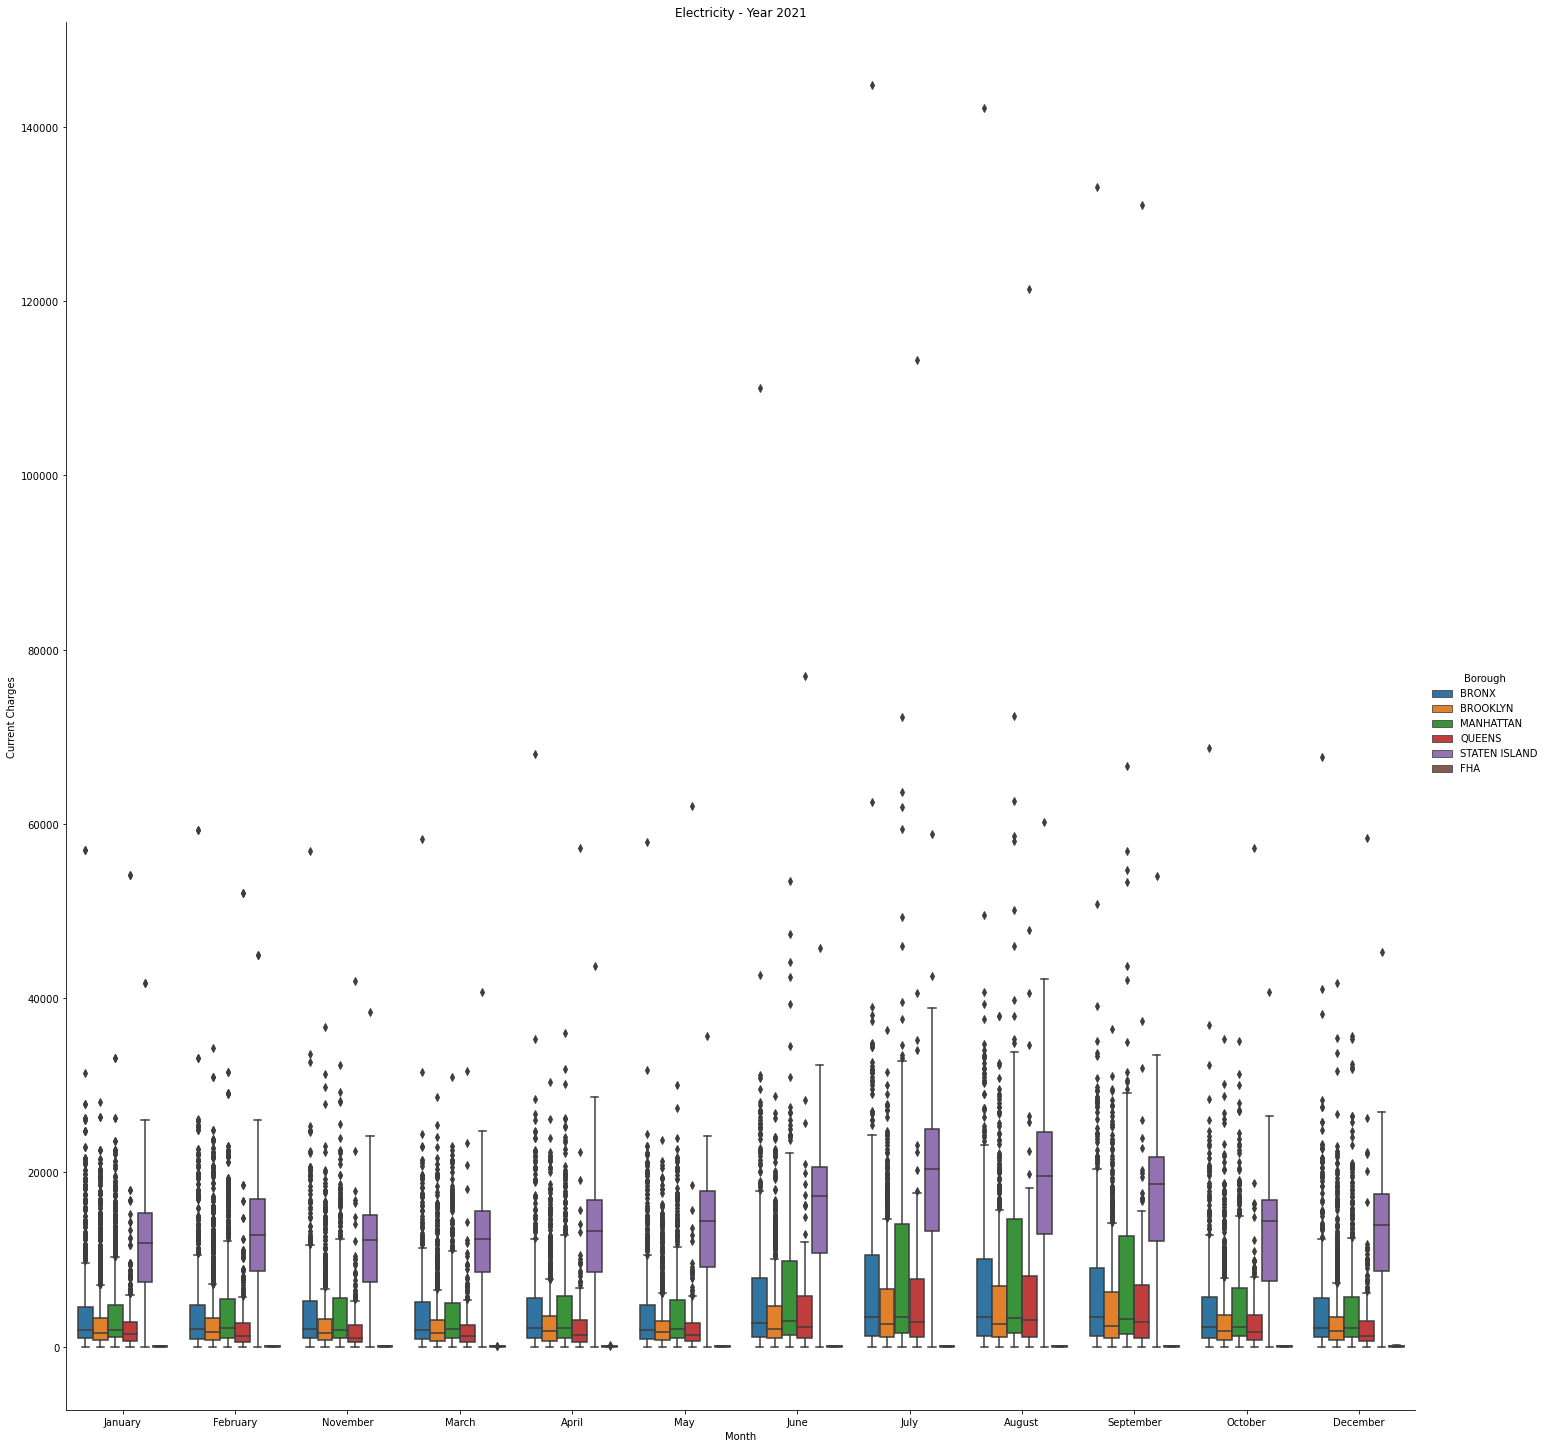

In [90]:
#plt.figure(figsize=(10,2))

sns.catplot(data=elec_data2021,x='Month',y='Current Charges',hue='Borough',kind='box',height=20,).set(title='Electricity - Year 2021')